In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load Dataset

In [3]:
(x_train, y_train),(x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
# Here we see there are 50000 training images and 1000 test images

In [6]:
y_train.shape

(50000, 1)

In [8]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [9]:
# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [10]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[2]

'bird'

In [13]:
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

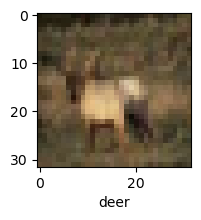

In [14]:
plot_sample(x_train, y_train,3)

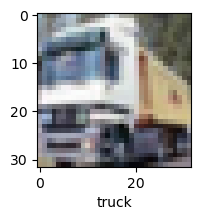

In [15]:
plot_sample(x_train, y_train,1)

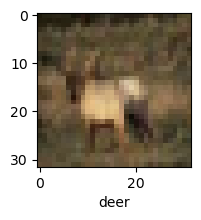

In [16]:
plot_sample(x_train, y_train,3)

In [17]:
# Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [18]:
x_train = x_train/255
x_test = x_test/255

In [19]:
# Build simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

In [37]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.34      0.45      1000
           1       0.65      0.54      0.59      1000
           2       0.38      0.32      0.35      1000
           3       0.33      0.36      0.35      1000
           4       0.51      0.33      0.40      1000
           5       0.43      0.30      0.36      1000
           6       0.37      0.79      0.50      1000
           7       0.60      0.50      0.54      1000
           8       0.44      0.77      0.55      1000
           9       0.63      0.41      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [38]:
# Now let us build a convolutional neural network to train our images

In [4]:
cnn = models.Sequential([
    # first convolution and relu
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # second convolution and relu
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

NameError: name 'models' is not defined

In [42]:
# Now we compile specify optimizer, loss and metrics

In [43]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
cnn.fit(x_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.6194 - accuracy: 0.7848
Epoch 2/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5883 - accuracy: 0.7926
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5637 - accuracy: 0.8028
Epoch 4/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5352 - accuracy: 0.8121
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5105 - accuracy: 0.8214
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4884 - accuracy: 0.8280
Epoch 7/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4644 - accuracy: 0.8353
Epoch 8/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4388 - accuracy: 0.8445
Epoch 9/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4232 - accuracy: 0.8503
Epoch 10/20
1563/1563 [==============================] - 16s 10ms/s

In [49]:
# With CNN, at the end 20 epochs,
# accuracy was at around 90% which is a significant improvement over ANN.
# CNN's are best for image classification and gives superb accuracy.
# Also computation is much less compared to simple ANN as maxpooling 
# reduces the image dimensions while still preserving the features

In [50]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.6426 - accuracy: 0.6745


[1.6425998210906982, 0.6744999885559082]

In [51]:
# now we reshape the y again and test

In [53]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[1.5828223e-06, 4.9516768e-07, 7.6342394e-06, 9.9941862e-01,
        1.1121119e-05, 2.2863318e-05, 3.5137805e-04, 1.7401398e-10,
        1.8321075e-04, 3.0397796e-06],
       [2.2832588e-05, 5.1518723e-02, 3.6292817e-13, 1.8463703e-08,
        7.6947720e-10, 1.1312861e-16, 5.3949671e-15, 1.3005162e-20,
        9.4845450e-01, 3.8888593e-06],
       [3.5417208e-01, 1.8846657e-02, 5.0197700e-06, 2.5271231e-04,
        6.2380219e-05, 6.7215042e-05, 4.2627107e-06, 2.5277330e-05,
        1.5182636e-02, 6.1138165e-01],
       [5.5834395e-01, 1.0903303e-06, 3.1820091e-04, 1.2621804e-05,
        2.8528391e-06, 3.1571812e-08, 1.7383307e-05, 4.6955174e-12,
        4.4130388e-01, 1.2437613e-08],
       [5.0003113e-08, 5.4028504e-07, 2.9247856e-02, 1.3450709e-03,
        4.9283374e-02, 5.6025703e-05, 9.2006624e-01, 1.4656959e-10,
        8.2447605e-07, 1.0837347e-08]], dtype=float32)

In [54]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 6]

In [57]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

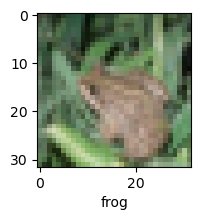

In [61]:
plot_sample(x_test, y_test,4)

In [62]:
classes[y_classes[4]]

'frog'

In [63]:
classes[y_classes[3]]

'airplane'

In [64]:
classes[y_classes[2]]

'truck'

In [65]:
classes[y_classes[1]]

'ship'

In [66]:
classes[y_classes[0]]

'cat'

In [3]:
classes[y_classes[15]]

NameError: name 'classes' is not defined